In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
from scipy.signal import butter, filtfilt, lfilter
import matplotlib.pyplot as plt
import copy

from butter import *
from EMG_RMS import filtered_to_rms, cropped_to_rms
from get_timepoint import *
from signal_slice import kinematic_crop
import rms_envelope
# from butter import butter_bandpass, butter_bandstop, butter_bandpass_filter, butter_bandstop_filter

In [2]:
#Read csv file and transform it into pandas dataframe
EMG_Sensor= {'R_biceps':0,
            'R_anterior deltoid':1,
            'L_biceps':2,
            'L_anterior deltoid':3,
            'R_erector spinae muscle':4,
            'L_erector spinae muscle':5,
            'R_gluteus maximus':6,
            'L_gluteus maximus':7,
            'R_biceps femoris':8,
            'L_biceps femoris':9,                                                                                                                                                                                                                                 
}

file_name=['OFF_1','OFF_2','OFF_3','ON_1','ON_2','ON_3']
raw_data_dict  = {}

for name in file_name:
    raw_data_dict[name] = pd.read_csv(f'C:/Users/Ahn/Desktop/OneDrive - SNU/Sports Engineering Lab/DATA/ANGEL/Resampled/{name}.csv').to_numpy().T[1::2]
    
    for line in range(len(EMG_Sensor)):
        raw_data_dict[name][line] -= np.mean(raw_data_dict[name][line])

# print(raw_data_dict['OFF_3'])

#remove offset line by line
# for i in range(len(EMG_Sensor)):
#     Raw_data_np[i] -= np.mean(Raw_data_np[i])

# print(Raw_data_np)

In [4]:
#Read csv file and transform it into pandas dataframe

Raw_data_df = pd.read_csv('C:/Users/Ahn/Desktop/OneDrive - SNU/Sports Engineering Lab/DATA/ANGEL/Resampled/OFF_1.csv')

#EMG sensor attachment order
EMG_Sensor= {'R_biceps':0,
            'R_anterior deltoid':1,
            'L_biceps':2,
            'L_anterior deltoid':3,
            'R_erector spinae muscle':4,
            'L_erector spinae muscle':5,
            'R_gluteus maximus':6,
            'L_gluteus maximus':7,
            'R_biceps femoris':8,
            'L_biceps femoris':9,                                                                                                                                                                                                                                 
}

############################
####### Remove Offset ######
############################
#Transpose data frame, get only emg data, and transform into numpy
Raw_data_np = Raw_data_df.to_numpy().T[1::2]

#remove offset line by line
for i in range(len(EMG_Sensor)):
    Raw_data_np[i] -= np.mean(Raw_data_np[i])

print(Raw_data_np)
print(np.divide(Raw_data_np,2))

[[ 1.52193079e-05  1.30093079e-05 -1.78069210e-06 ...  1.52193079e-05
   1.52193079e-05  1.52193079e-05]
 [-2.22432200e-06 -1.51632200e-06  3.48567800e-06 ... -2.22432200e-06
  -2.22432200e-06 -2.22432200e-06]
 [ 1.47104597e-05  1.21204597e-05 -7.88954030e-06 ...  1.47104597e-05
   1.47104597e-05  1.47104597e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.29697493e-06  8.25697493e-06 -1.00302507e-06 ...  9.29697493e-06
   9.29697493e-06  9.29697493e-06]
 [ 1.51818222e-06  9.47182218e-07 -2.99181778e-06 ...  1.51818222e-06
   1.51818222e-06  1.51818222e-06]]
[[ 7.60965395e-06  6.50465395e-06 -8.90346050e-07 ...  7.60965395e-06
   7.60965395e-06  7.60965395e-06]
 [-1.11216100e-06 -7.58161001e-07  1.74283900e-06 ... -1.11216100e-06
  -1.11216100e-06 -1.11216100e-06]
 [ 7.35522985e-06  6.06022985e-06 -3.94477015e-06 ...  7.35522985e-06
   7.35522985e-06  7.35522985e-06]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.0000000

In [3]:
#Apply Butterworth Bandpass filter
butter_bandpassed = butter_bandpass_filter(Raw_data_np, lowcut=20, highcut=450, fs=1000, order=4)

In [4]:
#Apply Butterworth Bandstop filter
butter_bandstopped = butter_bandstop_filter(butter_bandpassed, lowcut=59, highcut=61, fs=1000, order=4)
print(butter_bandstopped)

[[ 4.76317265e-08 -9.85741407e-07 -1.39725617e-05 ...  8.08598979e-09
  -3.22688188e-08 -6.94339084e-08]
 [ 1.10664303e-07  6.73712798e-07  5.49070752e-06 ...  3.63923450e-08
   2.18757839e-08  3.85046591e-09]
 [-1.88405395e-06 -2.03679569e-06 -1.97339562e-05 ... -2.10607424e-08
  -6.91416503e-08 -1.09834442e-07]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.77250925e-07 -7.24115872e-07 -8.90994380e-06 ...  2.12042623e-07
   1.88258176e-07  1.37221540e-07]
 [ 9.54655434e-07  4.29735340e-07 -3.28128832e-06 ...  3.88964399e-07
   3.27616385e-07  2.17908371e-07]]


In [5]:
cropped_emg_lift, cropped_emg_lower = kinematic_crop(butter_bandstopped, get_peak('C:/Users/Ahn/Desktop/OneDrive - SNU/Sports Engineering Lab/DATA/ANGEL/box_kinematic/OFF_1.csv'))
cropped_emg_rms_lift, cropped_emg_rms_lower = cropped_to_rms(cropped_emg_lift), cropped_to_rms(cropped_emg_lower)

c:\Users\Ahn\Desktop\OneDrive - SNU\Sports Engineering Lab\CODE\EMG_Analysis\signal_slice.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(cropped_emg_lift), np.array(cropped_emg_lower)


In [6]:
rms_envelope_lift, rms_envelope_lower = rms_envelope.mov_avg(cropped_emg_rms_lift), rms_envelope.mov_avg(cropped_emg_rms_lower)
# lift_rms_filtered, lower_rms_filtered = rms_envelope.freq_filter(cropped_emg_rms_lift,10,100), rms_envelope.freq_filter(cropped_emg_rms_lower,10,100)

In [10]:
print(np.min(rms_envelope_lift[0][0]))
# plt.plot(rms_envelope.freq_filter(cropped_emg_rms_lift,10,100)[8][5])
# plt.plot(rms_envelope.mov_avg(cropped_emg_rms_lift)[8][5])


6.196456006087683e-06


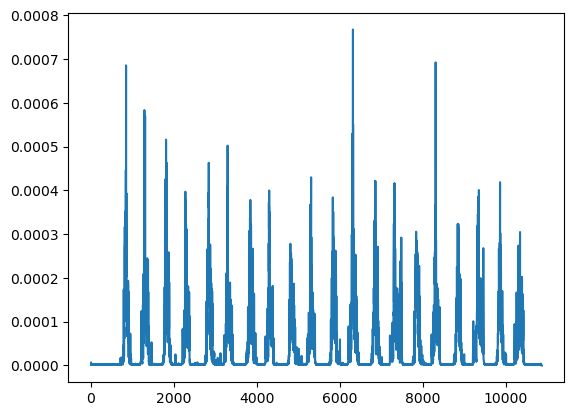

In [19]:
plt.plot(filtered_to_rms(butter_bandstopped[0]))

223


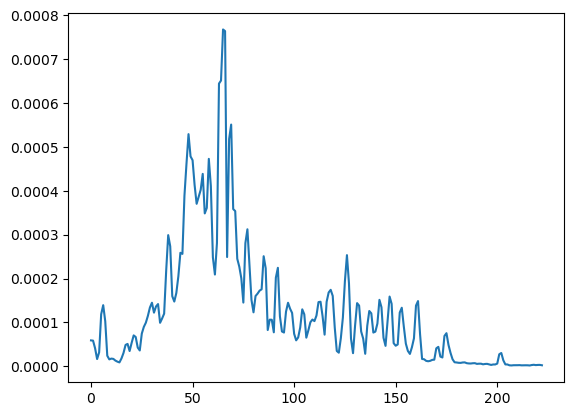

In [20]:
print(len(filtered_to_rms(butter_bandstopped[0][75000:77690])))
plt.plot(filtered_to_rms(butter_bandstopped[0][75000:77690]))


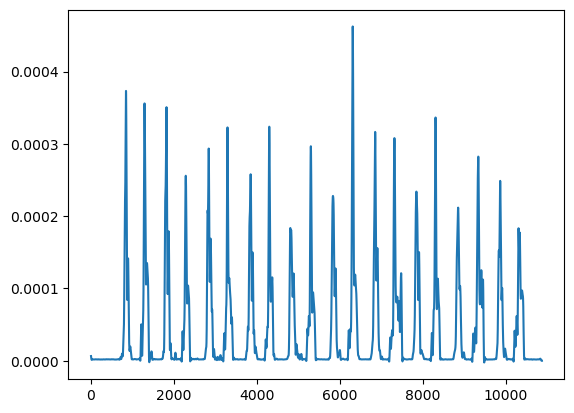

In [8]:
plt.plot(butter_lowpass_filter((filtered_to_rms(butter_bandstopped[0])),3,100))

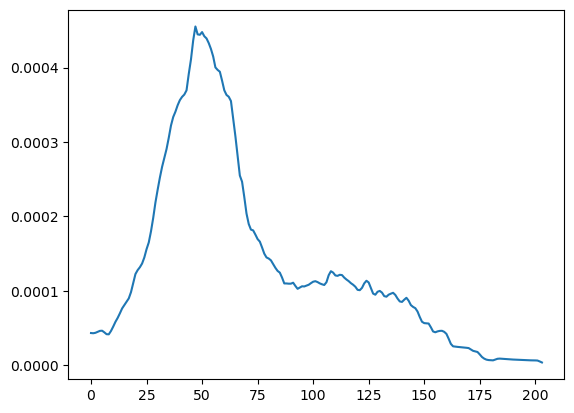

In [19]:
plt.plot(moving_average(filtered_to_rms(butter_bandstopped[0][75000:77690]),20))

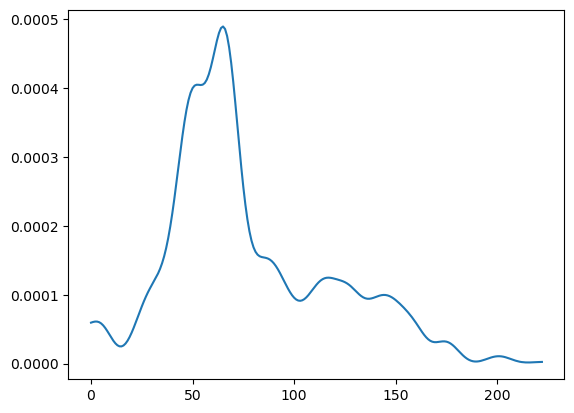

In [21]:
plt.plot(butter_lowpass_filter((filtered_to_rms(butter_bandstopped[0][75000:77690])),5,100))

In [ ]:
bandpass

bandstop

rms

---filter??  

normalization

--filtflit 는 zero lag filter

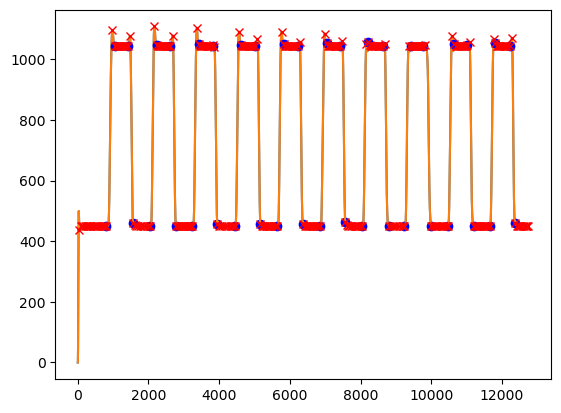

[7920, 20450, 32390, 44330, 56440, 68470, 80380, 92400, 104640, 116560]
[10430, 22350, 34310, 46160, 58240, 70430, 82160, 94190, 106450, 118130]
[14120, 26140, 38120, 50170, 62170, 74200, 86220, 97630, 110130, 122170]
[15620, 27730, 39450, 51650, 63650, 75690, 87980, 100020, 112010, 123620]


In [3]:
get_peak_plot('C:/Users/Ahn/Desktop/OneDrive - SNU/Sports Engineering Lab/DATA/ANGEL/box_kinematic/ON_1.csv')
d = get_peak('C:/Users/Ahn/Desktop/OneDrive - SNU/Sports Engineering Lab/DATA/ANGEL/box_kinematic/ON_1.csv')
for i in range(4):
    print(d[i])


In [14]:
list1 = [[1], [2, 22], [3, 19], [4, 7]]
list2 = [[1], [2, 22], [3, 19], [4, 7]]
list3 = [[1], [2, 22], [3, 19], [4, 7]]

list4 = list1 + list2 +list3
print(list4)
print(np.concatenate(list4).tolist())


[[1], [2, 22], [3, 19], [4, 7], [1], [2, 22], [3, 19], [4, 7], [1], [2, 22], [3, 19], [4, 7]]
[1, 2, 22, 3, 19, 4, 7, 1, 2, 22, 3, 19, 4, 7, 1, 2, 22, 3, 19, 4, 7]


In [32]:
a = np.empty((0,10))
a= np.append(a,np.array([[1,2,3,3,3,3,3,3,3,3]]),axis=0)
a= np.append(a,np.array([[1,2,3,3,3,3,3,3,3,3]]),axis=0)
a= np.append(a,np.array([[1,2,3,3,3,3,3,3,3,3]]),axis=0)
print(a)

[[1. 2. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 2. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 2. 3. 3. 3. 3. 3. 3. 3. 3.]]


In [9]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [19]:
import numpy as np

# Create a 2D array with shape (2, 3)
arr2d = np.array([[1, 2, 3], [4, 5, 6]])

# Create a 1D array with shape (3,)
arr1d = np.array([7, 8, 9])

# Append the 1D array to the bottom of the 2D array
new_arr = np.vstack((arr2d, arr1d))

# Print the new array
print(new_arr)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


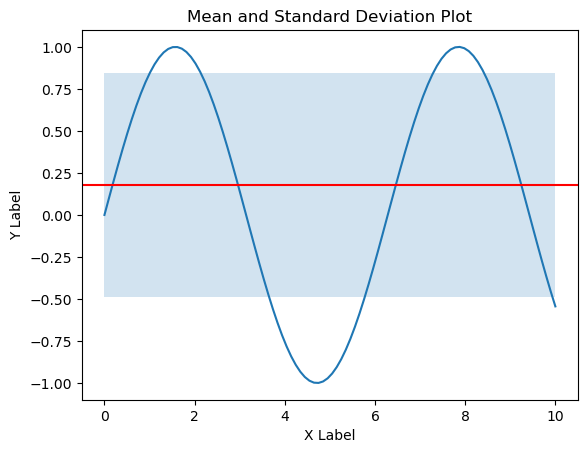

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Calculate the mean and standard deviation of the data
mean = np.mean(y)
std = np.std(y)

# Plot the data with shaded standard deviation
plt.plot(x, y)
plt.fill_between(x, mean - std, mean + std, alpha=0.2)
plt.axhline(y=mean, color='r', linestyle='-')

# Add axis labels and a title
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Mean and Standard Deviation Plot')

# Show the plot
plt.show()

In [ ]:
# Define lists of muscles to process
muscles = ['biceps', 'anterior deltoid', 'erector spinae muscle', 'gluteus maximus', 'biceps femoris']
lift_off_files = [file_name[:3] for file_name in file_names]
lift_on_files = [file_name[3:] for file_name in file_names]

# Loop through each muscle and file type to process the data
for muscle in muscles:
    for file_type in ['lift_off', 'lift_on', 'lower_off', 'lower_on']:
        # Define the EMG sensor names for the current muscle
        sensor_names = [f'R_{muscle}', f'L_{muscle}']
        # Call the data_reform function to process the data
        reformed_data = data_reform(percent_normed_lift if 'lift' in file_type else percent_normed_lower,
                                    lift_off_files if 'lift_off' in file_type else lift_on_files,
                                    *sensor_names)


In [ ]:
# Define list of muscles to process
muscles = ['biceps', 'anterior deltoid', 'erector spinae muscle', 'gluteus maximus', 'biceps femoris']

# Process data for each muscle and condition
for muscle in muscles:
    for condition in ['lift_off', 'lift_on', 'lower_off', 'lower_on']:
        file_subset = file_name[:3] if condition.startswith('lift') else file_name[3:]
        muscle_data = data_reform(percent_normed_lift if condition.startswith('lift') else percent_normed_lower, 
                                  file_subset, EMG_Sensor[f'R_{muscle}'], EMG_Sensor[f'L_{muscle}'])
        # Do something with muscle_data


In [24]:
a = np.array([1,2,3])
b = np.array([1,2,3])
len(a+b)

3